<a href="https://colab.research.google.com/github/sarvnn/EIP4/blob/master/Assignment-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


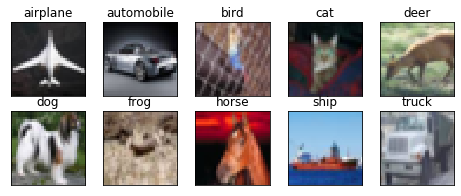

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 29s 73ms/step - loss: 1.8398 - acc: 0.2977 - val_loss: 1.3740 - val_acc: 0.4900
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3211 - acc: 0.5218 - val_loss: 1.0737 - val_acc: 0.6218
Epoch 3/50
390/390 [==============================] - 20s 53ms/step - loss: 1.1081 - acc: 0.6078 - val_loss: 0.9354 - val_acc: 0.6685
Epoch 4/50
390/390 [==============================] - 21s 53ms/step - loss: 0.9647 - acc: 0.6628 - val_loss: 0.8323 - val_acc: 0.7152
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8668 - acc: 0.7016 - val_loss: 0.7547 - val_acc: 0.7436
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7947 - acc: 0.7281 - val_loss: 0.7486 - val_acc: 0.7480
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7341 - acc: 0.7499 - val_loss: 0.6918 - val_acc: 0.7650
Epoch 8/50
390/390 [==============================] - 

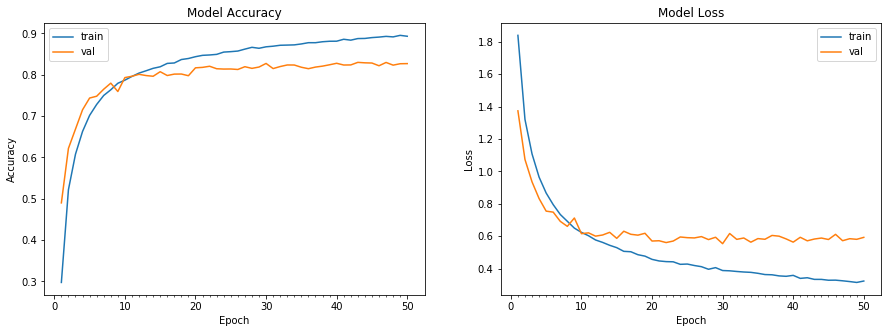

Accuracy on test data is: 82.69


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [45]:
# Definition of the model

#parameters
dp=0.1

model = Sequential()
 
model.add(SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3), depth_multiplier = 16)) ##Output size = 30x30 #Receptive field = 3x3 
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', depth_multiplier = 2)) ##Output size = 28x28 #Receptive field = 5x5
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(MaxPooling2D(pool_size=(2, 2))) #output size 14x14 

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', depth_multiplier = 2)) ##Output size = 12x12 #Receptive field after maxpooling = 3x3
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', depth_multiplier = 2)) ##Output size = 10x10 #Receptive field after maxpooling = 5x5
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(MaxPooling2D(pool_size=(2, 2)))#output size 5x5

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', depth_multiplier = 2)) ##Output size = 3x3 #Receptive field after maxpooling = 3x3
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(SeparableConv2D(filters=10, kernel_size=(3, 3), activation='relu', depth_multiplier = 1))  ##Output size = 1x1 #Receptive field = 5x5
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# opt = Adam(lr=1e-2, momentum=0.9, decay=1e-2 / NUM_EPOCHS)
# model.compile(loss="categorical_crossentropy", optimizer=opt,
# 	metrics=["accuracy"])
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_101 (Separa (None, 30, 30, 32)        2000      
_________________________________________________________________
batch_normalization_94 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_90 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_102 (Separa (None, 28, 28, 64)        4736      
_________________________________________________________________
batch_normalization_95 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_91 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 64)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=585, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
585/585 [==============================] - 123s 211ms/step - loss: 1.0904 - acc: 0.6166 - val_loss: 1.0586 - val_acc: 0.6479
Epoch 2/50
585/585 [==============================] - 123s 209ms/step - loss: 0.8481 - acc: 0.7040 - val_loss: 0.8476 - val_acc: 0.7125
Epoch 3/50
585/585 [==============================] - 122s 209ms/step - loss: 0.7471 - acc: 0.7387 - val_loss: 0.7321 - val_acc: 0.7526
Epoch 4/50
585/585 [==============================] - 123s 210ms/step - loss: 0.6809 - acc: 0.7632 - val_loss: 0.7229 - val_acc: 0.7590
Epoch 5/50
585/585 [==============================] - 122s 209ms/step - loss: 0.6366 - acc: 0.7779 - val_loss: 0.5847 - val_acc: 0.8023
Epoch 6/50
585/585 [==============================] - 122s 209ms/step - loss: 0.6022 - acc: 0.7895 - val_loss: 0.6201 - val_acc: 0.7957
Epoch 7/50
585/585 [==============================] - 122s 209ms/step - loss: 0.5718 - acc: 0.8002 - val_loss: 0.5485 - val_acc: 0.8147
Epoch 8/50
585/585 [============================

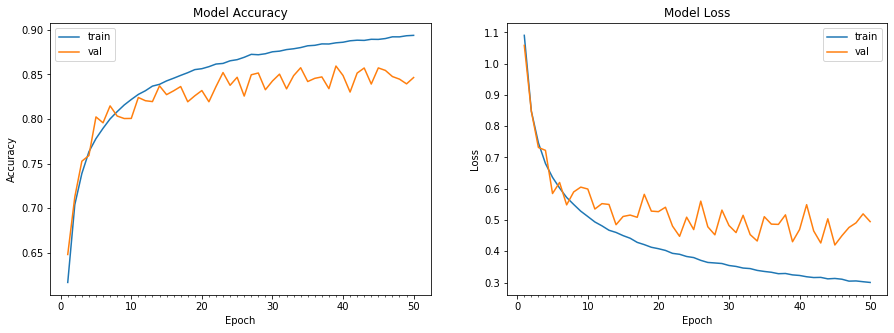

Accuracy on test data is: 84.65


In [49]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.05,
	width_shift_range=0.1, height_shift_range=0.1, 
	horizontal_flip=True, fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = 3*train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)

# model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#Epoch 39/50 - val_acc: 0.8594
121s 208ms/step - loss: 0.3247 - acc: 0.8855 - val_loss: 0.4305 - val_acc: 0.8594